In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def pltNormal():
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['figure.subplot.bottom'] = 0.15
    plt.rcParams['figure.subplot.left'] = 0.15
    plt.rcParams["font.size"]=12

def axNormal(ax):
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')

pltNormal()

In [2]:
trainInput=np.zeros((0,5))  # [n1,n2,b,v,label]

for i in np.arange(4):
    MDdata=TiO2.TiO2()
    MDdata.sizeSet(i)
    MDdata.tempSet(1000)
    MDdata.mapping()
    j=0
    for pss in MDdata.pArray:
        for ib in np.arange(np.size(MDdata.bs)):
            for iv in np.arange(np.size(MDdata.vs)):
                addData=np.array([[MDdata.ns[MDdata.n1],MDdata.ns[j],MDdata.bs[ib],MDdata.vs[iv],pss[iv][ib]]])
                trainInput=np.append(trainInput,addData,axis=0)
        j+=1

#trainInput = pd.DataFrame(trainInput, columns = ['ni','nj','b','v0','p'])
X = trainInput.T[0:4] # 説明変数
X=X.T
Y = trainInput.T[4].round(0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) 
lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習
Y_pred = lr.predict(X_test)
N=0
correct=0
for i in np.arange(np.size(Y_test)):
    if(Y_test[i].round(0)==Y_pred[i]):
        correct+=1
    N+=1
print(correct/N)

0.9094951923076923


In [48]:
ns=np.array((9,24,48,84,129,198,291,390,534,696,882,1098,1356))
dpString=np.array(("0.6nm","0.8nm","1nm","1.2nm","1.4nm","1.6nm","1.8nm","2nm","2.2nm","2.4nm","2.6nm","2.8nm","3nm"))
Nsize=np.size(ns)
n1=2
Ni=ns[n1]
bs=np.arange(0,80,1)
v0s=np.arange(20,700,10)
input=np.zeros((np.size(v0s),np.size(bs)))

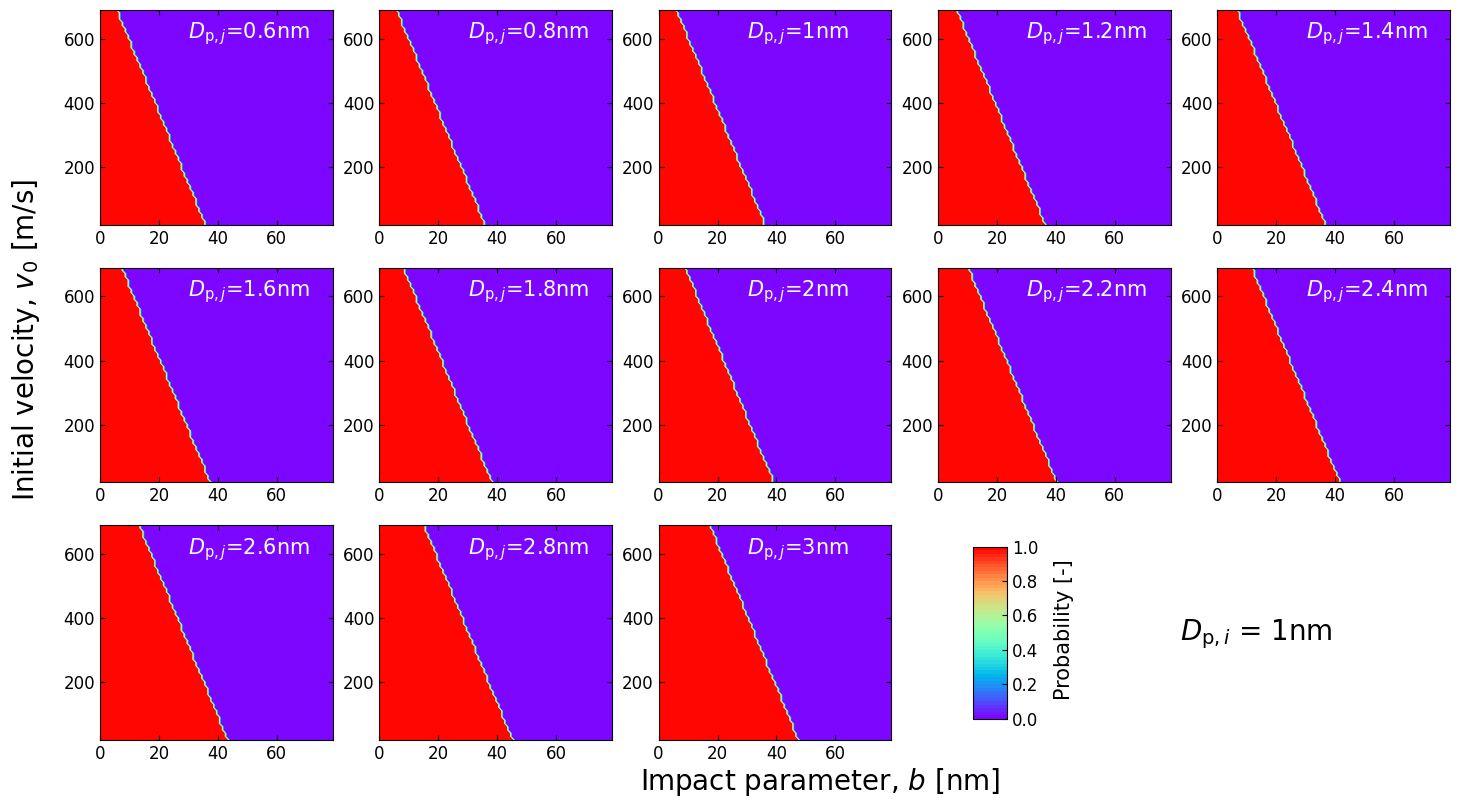

In [47]:
fig, axs = plt.subplots(3,5,figsize=(18,10))
for i in np.arange(15):
    axNormal(axs.flat[i])
fig.text(0.55,0.1,r"Impact parameter, $b$ [nm]",ha="center",size=20)
fig.text(0.10,0.55,"Initial velocity, $v_0$ [m/s]",va="center",rotation="vertical",size=20)
figRes=50

for n2 in np.arange(Nsize):
    Nj=ns[n2]
    i=0
    for b in bs:
        j=0
        for v0 in v0s:
            x=np.array([[Ni,Nj,b,v0]])
            input[j][i]=lr.predict(x)
            j+=1
        i+=1
    axs.flat[n2].text(30,600,r"$D_{{\rm p},j}$="+dpString[n2],size=15,color="white")
    axs.flat[n2].contourf(bs,v0s,input,figRes,cmap="rainbow")

fig.delaxes(axs.flat[13])
fig.delaxes(axs.flat[14])
im1=axs.flat[12].contourf(bs,v0s,input,figRes,cmap="rainbow")
cbar=plt.colorbar(im1, ax=axs[2,3],fraction=0.85,aspect=5,shrink=0.8,pad=2,ticks=np.array([0,0.2,0.4,0.6,0.8,1]))
fig.text(0.68,0.26,"Probability [-]",va="center",rotation="vertical",size=15)
fig.text(0.75, 0.25, r"$D_{{\rm p},i}$ = "+dpString[n1], fontsize = 20)
plt.savefig("Probability.png", dpi=1000)
plt.show()


In [56]:
from matplotlib.ticker import FormatStrFormatter
strs=["0.6","1","2"]
MD=np.zeros(0)
NN=np.zeros(0)
v=np.zeros(0)
for s in strs:
    data=np.loadtxt("../MD_postProcessing/"+s+"nm.dat")
    for d in data:
        for b in np.arange(1,100,0.1):
            x=np.array([[d[0],d[1],b*10,d[2]]])
            p=lr.predict(x)
            if(p==0.0):
                break
        MD=np.append(MD,d[3])
        NN=np.append(NN,b*10)
        v=np.append(v,d[2])
MD2=MD*MD
NN2=NN*NN
MDNN=MD*NN
N=np.size(MD)
X=N*np.sum(MD2)-(np.sum(MD))**2
Y=N*np.sum(NN2)-(np.sum(NN))**2
R2=(N*np.sum(MDNN)-np.sum(MD)*np.sum(NN))/(X**0.5*Y**0.5)
MSE=np.sum((MD-NN)**2)/N

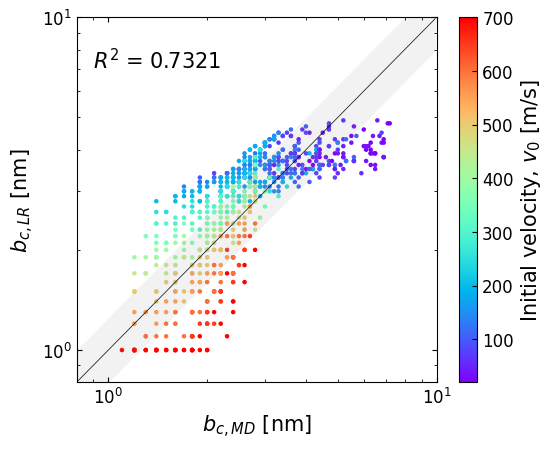

In [76]:
x=np.arange(8,100)
fig, axs = plt.subplots(1,1,figsize=(6,5))
axNormal(axs)

mainplt=axs.scatter(MD*0.1,NN*0.1,s=5,c=v,marker="o",cmap="rainbow")
axs.plot(x*0.1,x*0.1,linewidth=0.5,c="black")
axs.fill_between(x*0.1,x*0.1*0.8,x*0.1*1.25,color="gray",alpha=0.1,lw=0.01)

axs.set_xlim([0.8,10])
axs.set_ylim([0.8,10])
axs.set_xscale("log")
axs.set_yscale("log")
axs.set_xlabel(r"$\it b_{c,MD}$ [nm]", fontsize=15)
axs.set_ylabel(r"$\it b_{c,LR}$ [nm]", fontsize=15)
cb=fig.colorbar(mainplt)
cb.set_label(r'Initial velocity, $v_0$ [m/s]', size=15)
axs.text(0.9,7,r"$\it R^{2}$ = "+'{:.4f}'.format(R2), fontsize=15)

plt.savefig("MDLR.png", dpi=1000)
plt.show()


In [82]:
kb=1.38e-23
R=8.314
Mmono=(16+16+48)*1e-3

def NtoD(N):
    return 10.0*(N/48.0)**0.33333

def DtoN(D):
    return (D/10.0)**3*48.0

def Beta(N1,N2,T):
    if(N1>N2):
        n1=N2
        n2=N1
    else:
        n1=N1
        n2=N2    
    n=np.array((n1,n2))
    m=n/3.0*Mmono				# Molar mass of clusters [kg/mol]
    mij=m[0]*m[1]/(m[0]+m[1])		# Reduced molar mass [kg/mol]
    mijxtwoRT_inv=mij/(R*T*2.0)# coefficient
    coeff=(mij*0.5/np.pi/T/R)**1.5*8*np.pi*np.pi*2**0.5
    beta=0
    for b in bs:
        for v in v0s:
            x=np.array([[n1,n2,b,v]])
            p=lr.predict(x)
            length=coeff*v**3*np.exp(-mijxtwoRT_inv*v*v)*b*p
            beta+=length*10
    return beta*1e-20

T=300
x=np.arange(1,10,0.01)
MD=np.zeros(0)
NN=np.zeros(0)
rcr=np.zeros(0)
for s in ["0.6nm","1nm","2nm"]:
    data=np.loadtxt("../MD_postProcessing/"+s+"_beta.dat")
    betaMD=data[np.where(data.T[3]==T)]
    for i in betaMD:
        ni=DtoN(i[0]*10)         # dp to N (1st cluster)
        nj=DtoN(i[1]*10)         # dp to N (2nd cluster)
        MD=np.append(MD,i[2])
        beta=Beta(ni,nj,T)
        NN=np.append(NN,beta)
        rcr=np.append(rcr,(i[0]+i[1])*0.5)
MD2=MD*MD
NN2=NN*NN
MDNN=MD*NN
N=np.size(MD)
X=N*np.sum(MD2)-(np.sum(MD))**2
Y=N*np.sum(NN2)-(np.sum(NN))**2
R2=(N*np.sum(MDNN)-np.sum(MD)*np.sum(NN))/(X**0.5*Y**0.5)
MSE=np.sum((MD-NN)**2)/N

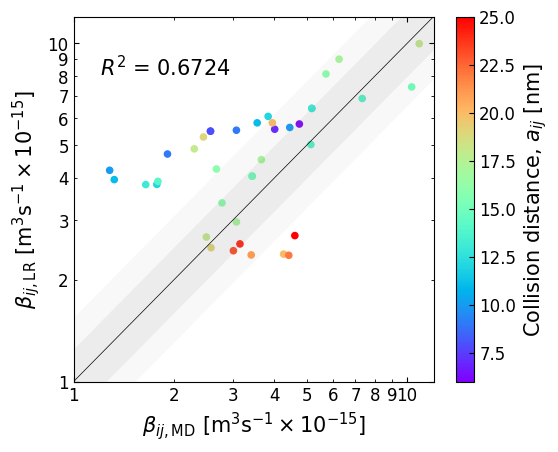

In [86]:
x=np.arange(1,12,0.01)
fig, axs = plt.subplots(1,1,figsize=(6,5))
axNormal(axs)

mainplt=axs.scatter(MD*1e15,NN*1e15*0.95,s=20,c=rcr*10,marker="o",cmap="rainbow")
axs.plot(x,x,linewidth=0.5,c="black")
axs.fill_between(x,x*0.8,x*1.25,color="gray",alpha=0.1,lw=0.01)
axs.fill_between(x,x*0.65,x*1.54,color="gray",alpha=0.05,lw=0.01)

axs.set_xlim([1,12])
axs.set_ylim([1,12])
axs.set_xlabel(r"$\beta _{ij,\rm{MD}}$ $[\rm {m}^3 \rm{s}^{-1} \times 10^{-15}]$", fontsize=15)
axs.set_ylabel(r"$\beta _{ij,\rm{LR}}$ $[\rm {m}^3 \rm{s}^{-1} \times 10^{-15}]$", fontsize=15)
axs.set_xscale("log")
axs.set_yscale("log")
axs.text(1.2,8,r"$\it R^{2}$ = "+'{:.4f}'.format(R2),fontsize=15)
cb=fig.colorbar(mainplt)
cb.set_label(r'Collision distance, $a_{ij}$ [nm]',size=15)
axs.yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs.yaxis.set_minor_formatter(FormatStrFormatter('%d'))
axs.xaxis.set_major_formatter(FormatStrFormatter('%d'))
axs.xaxis.set_minor_formatter(FormatStrFormatter('%d'))
plt.savefig("MDLR_beta_"+str(int(T))+".png", dpi=1000)
plt.show()